# Configuration

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Upload Data

In [2]:
# PATH = 'Fall_2024/IEORE4523_DA/Final_proj/'
PATH = ''
df = pd.read_csv(PATH+'spotify_songs.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_songs.csv'

In [ ]:
# check shape
df.shape[0]

32833

# Missing Value

In [ ]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
# see which columns have missing values
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [ ]:
# remove rows with any missing value 
df = df.dropna()

# Data Visualization

### Word Cloud

In [ ]:
#pip install wordcloud and nltk

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['track_album_release_date'] = df['track_album_release_date'].astype(str).str.strip()
df['year'] = df['track_album_release_date'].str[:4]
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [ ]:
# avoid including version information
df['track_name_cleaned'] = df['track_name'].str.lower()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('-').str[0].str.strip()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('feat', expand=True)[0].str.strip()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('emix', expand=True)[0].str.strip()
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
custom_stop_words = ['de', 'la',"el"]
stop_words = set(stopwords.words('english')).union(custom_stop_words)
df['track_name_cleaned'] = df['track_name_cleaned'].apply(
    lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hayoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


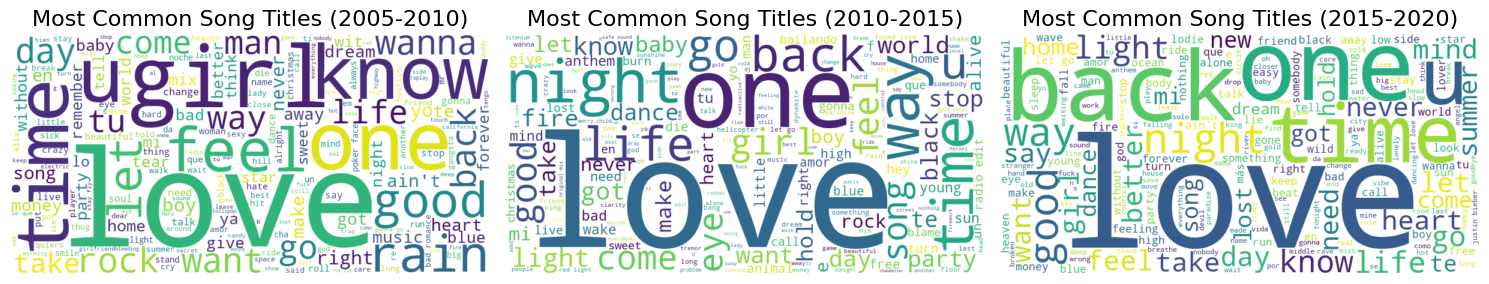

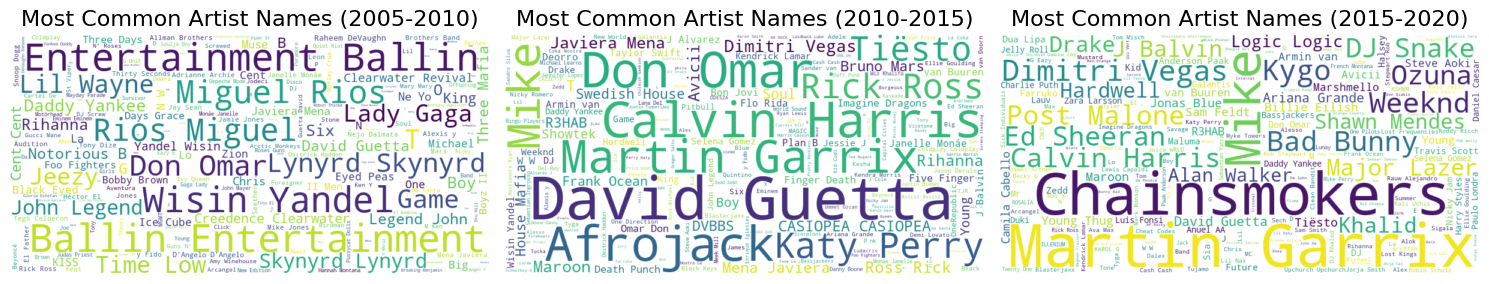

In [ ]:

year_ranges = [(2005, 2010), (2010, 2015), (2015, 2020)]
title_text_cleaned = {}
artist_text = {}

for start_year, end_year in year_ranges:
    filtered_range_data = df[(df['year'] >= start_year) & (df['year'] < end_year)]
    range_label = f"{start_year}-{end_year}"
    title_text_cleaned[range_label] = ' '.join(filtered_range_data['track_name_cleaned'].dropna().astype(str))
    artist_text[range_label] = ' '.join(filtered_range_data['track_artist'].dropna().astype(str))
plt.figure(figsize=(15, 8))
for i, range_label in enumerate(title_text_cleaned.keys()):
    plt.subplot(1, 3, i + 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text_cleaned[range_label])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Common Song Titles ({range_label})", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, range_label in enumerate(artist_text.keys()):
    plt.subplot(1, 3, i + 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(artist_text[range_label])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Common Artist Names ({range_label})", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Histograms of Song Duration

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

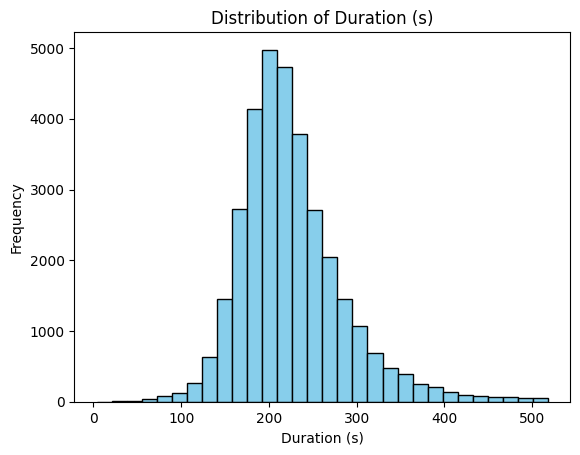

In [ ]:
# overall distribution of duration_ms
df['duration_s'] = df['duration_ms'] / 1000
overall_duration = df['duration_s']

plt.hist(overall_duration, bins=30, color = 'skyblue', edgecolor='black')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (s)')

plt.show()

In [ ]:
genres = df['playlist_genre'].unique()

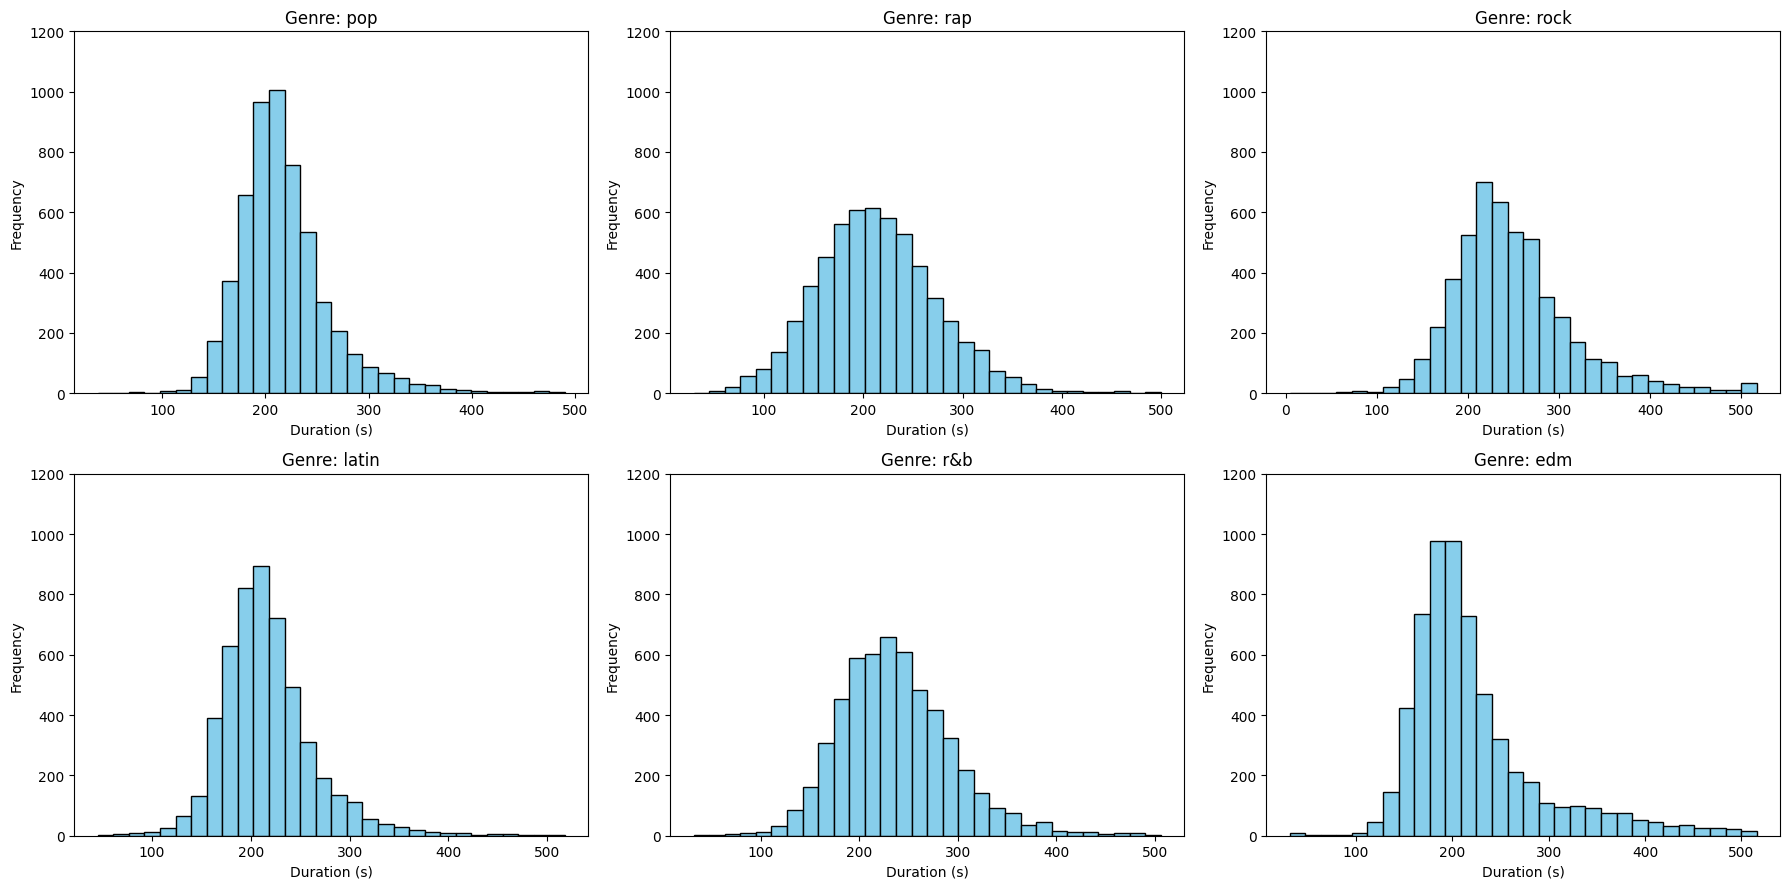

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()
y_lim = 1200

for i, genre in enumerate(genres):
    duration_by_genre = df[df['playlist_genre'] == genre]['duration_s']

    ax = axes[i]
    ax.hist(duration_by_genre, bins=30, color = 'skyblue', edgecolor='black')
    ax.set_title(f'Genre: {genre}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, y_lim)


plt.tight_layout()
plt.show()

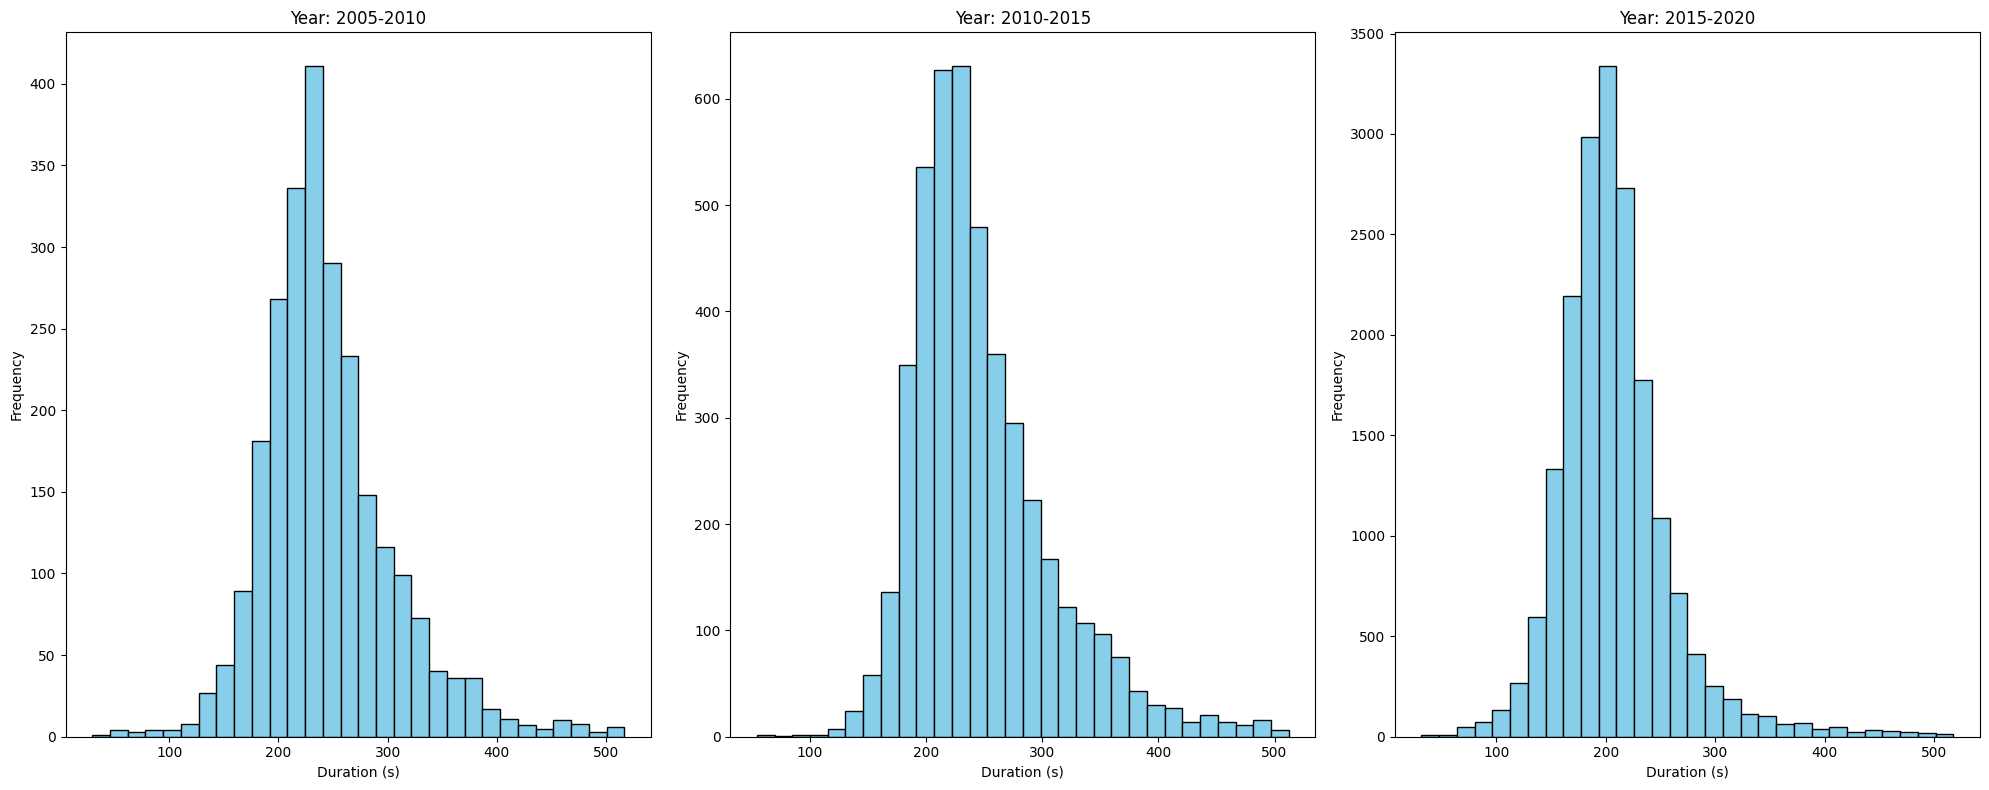

In [ ]:
year_ranges = [(2005, 2010), (2010, 2015), (2015, 2020)]
fig, axes = plt.subplots(1, len(year_ranges), figsize=(20, 8))
axes = axes.flatten()

for i, (start_year, end_year) in enumerate(year_ranges):
    duration_by_year = df[(df['year'] >= start_year) & (df['year'] < end_year)]['duration_s']
    year_label = f"{start_year}-{end_year}"

    ax = axes[i]
    ax.hist(duration_by_year, bins=30, color = 'skyblue', edgecolor='black')
    ax.set_title(f'Year: {year_label}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

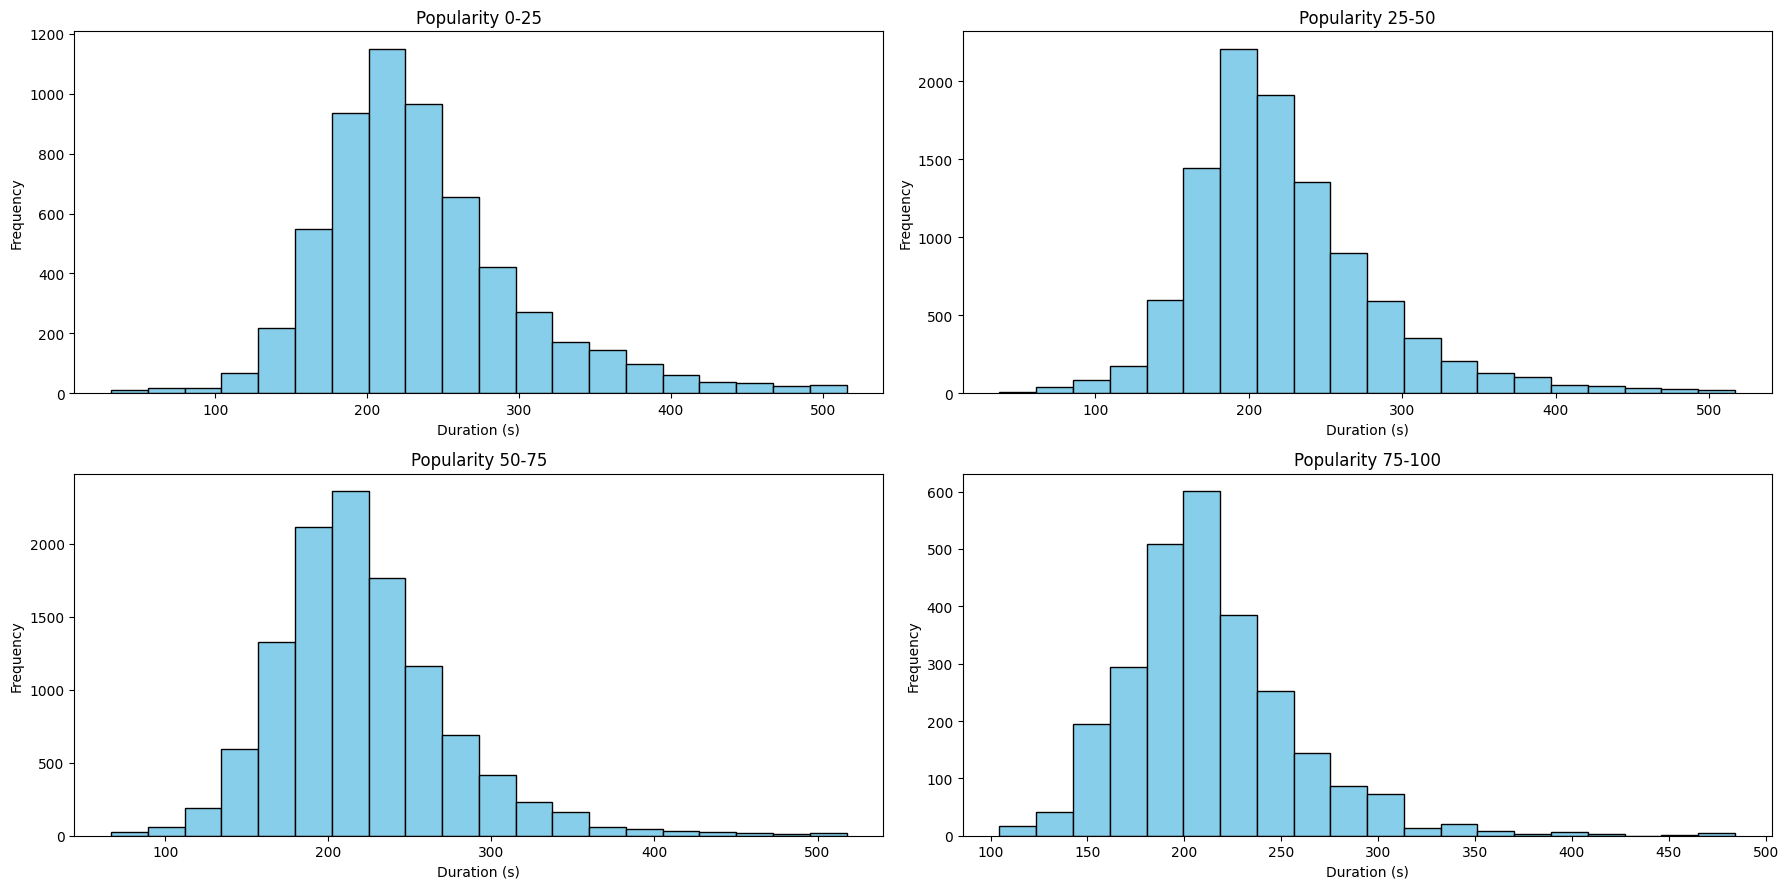

In [ ]:
pop_min = df['track_popularity'].min()
pop_max = df['track_popularity'].max()

ranges = np.linspace(pop_min, pop_max, 5) 
range_labels = [f'{int(ranges[i])}-{int(ranges[i+1])}' for i in range(4)]

fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes = axes.flatten()

for i in range(4):
    low, high = ranges[i], ranges[i+1]
    
    duration_by_popularity = df[(df['track_popularity'] > low) & (df['track_popularity'] <= high)]['duration_s']
    
    ax = axes[i]
    ax.hist(duration_by_popularity, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Popularity {range_labels[i]}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Track popularity

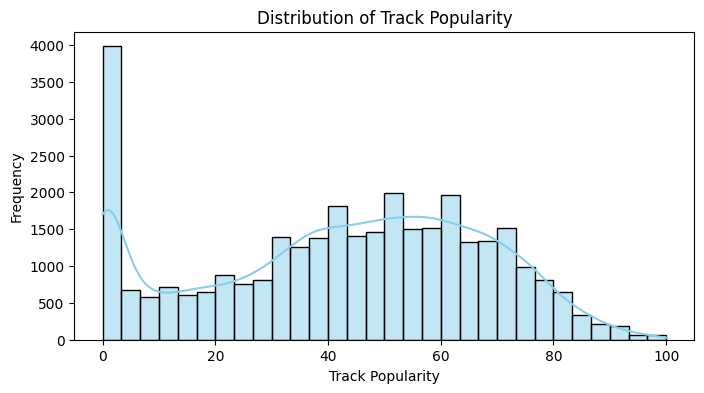

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# popularity distribution for all kinds of songs
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="track_popularity", kde=True, bins=30, color="skyblue", edgecolor='black')
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Group by genre and calculate mean popularity
genre_popularity = df.groupby("playlist_genre")["track_popularity"].mean().sort_values()
genre_popularity

playlist_genre
edm      34.833526
r&b      41.223532
rock     41.728338
rap      43.238029
latin    47.044828
pop      47.744870
Name: track_popularity, dtype: float64

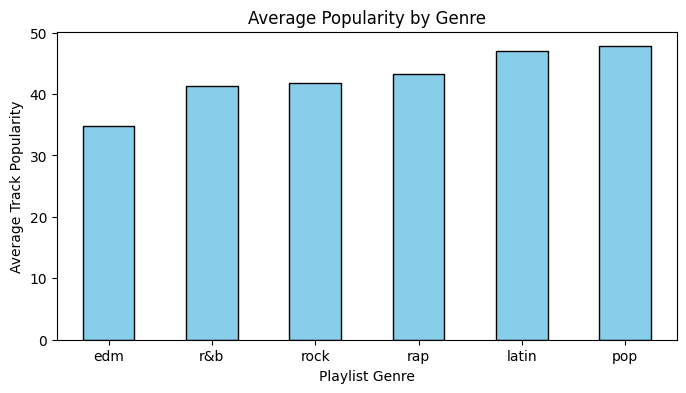

In [ ]:
plt.figure(figsize=(8,4))
genre_popularity.plot(kind="bar", color="skyblue", edgecolor='black')
plt.title("Average Popularity by Genre")
plt.xlabel("Playlist Genre")
plt.xticks(rotation=0)
plt.ylabel("Average Track Popularity")
plt.show()

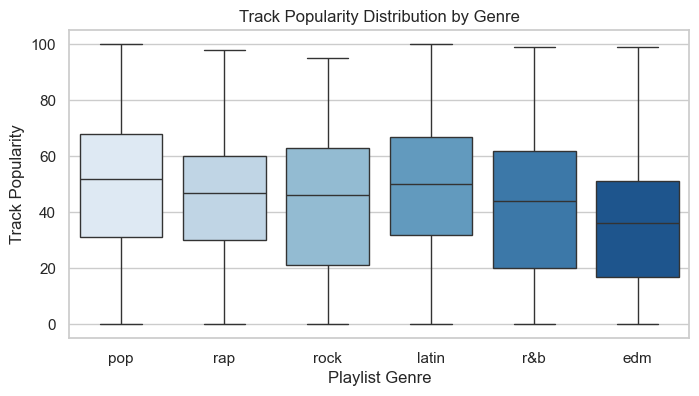

In [ ]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")

sns.boxplot(data=df, x="playlist_genre", y="track_popularity", palette="Blues")
plt.title("Track Popularity Distribution by Genre")
plt.xlabel("Playlist Genre")
plt.ylabel("Track Popularity")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# get release date in datetime version
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year

# Group by release year and calculate mean popularity
yearly_popularity = df.groupby("release_year")["track_popularity"].mean()
yearly_popularity

release_year
1957.0    59.000000
1958.0    73.000000
1961.0    47.000000
1963.0    36.250000
1964.0    42.750000
            ...    
2016.0    38.479659
2017.0    41.823020
2018.0    45.878623
2019.0    51.408415
2020.0    46.461146
Name: track_popularity, Length: 61, dtype: float64

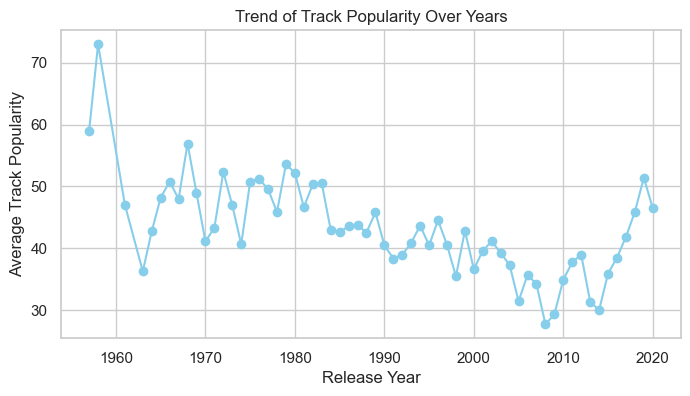

In [ ]:
# Plot popularity trend over years
plt.figure(figsize=(8,4))
plt.plot(yearly_popularity.index, yearly_popularity.values, marker="o", linestyle="-", color="skyblue")
plt.title("Trend of Track Popularity Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Track Popularity")
plt.grid(True)
plt.show()

In [ ]:
# average popularity of each genre in different years
genre_year_popularity = df.groupby(['playlist_genre', 'release_year'])['track_popularity'].mean().reset_index()
genre_year_popularity

,playlist_genre,release_year,track_popularity
0,edm,1980.0,29.000000
1,edm,1981.0,69.000000
2,edm,1990.0,35.000000
3,edm,1995.0,33.000000
4,edm,1996.0,42.000000
...,...,...,...
268,rock,2016.0,38.155844
269,rock,2017.0,37.112069
270,rock,2018.0,40.968992
271,rock,2019.0,36.178510


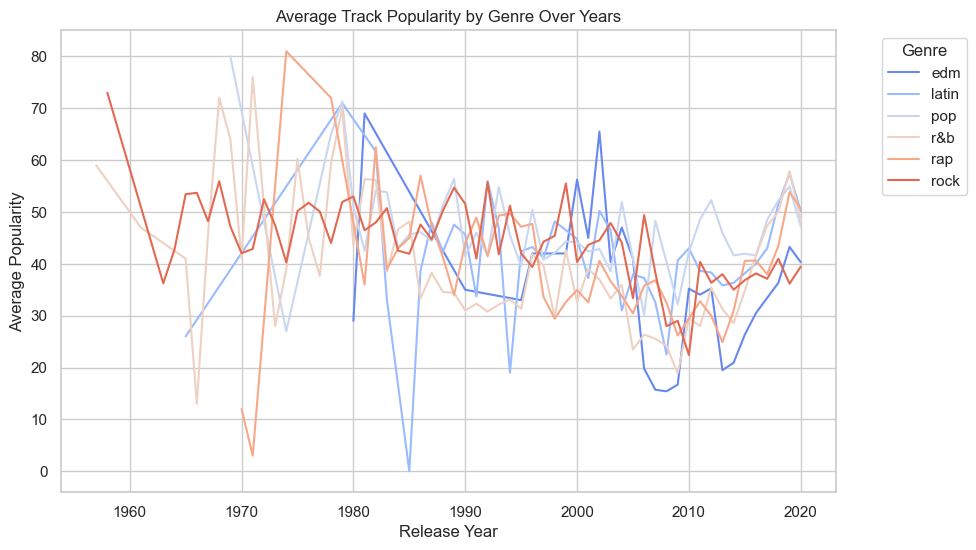

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=genre_year_popularity, x='release_year', y='track_popularity', hue='playlist_genre', palette='coolwarm')

plt.title('Average Track Popularity by Genre Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

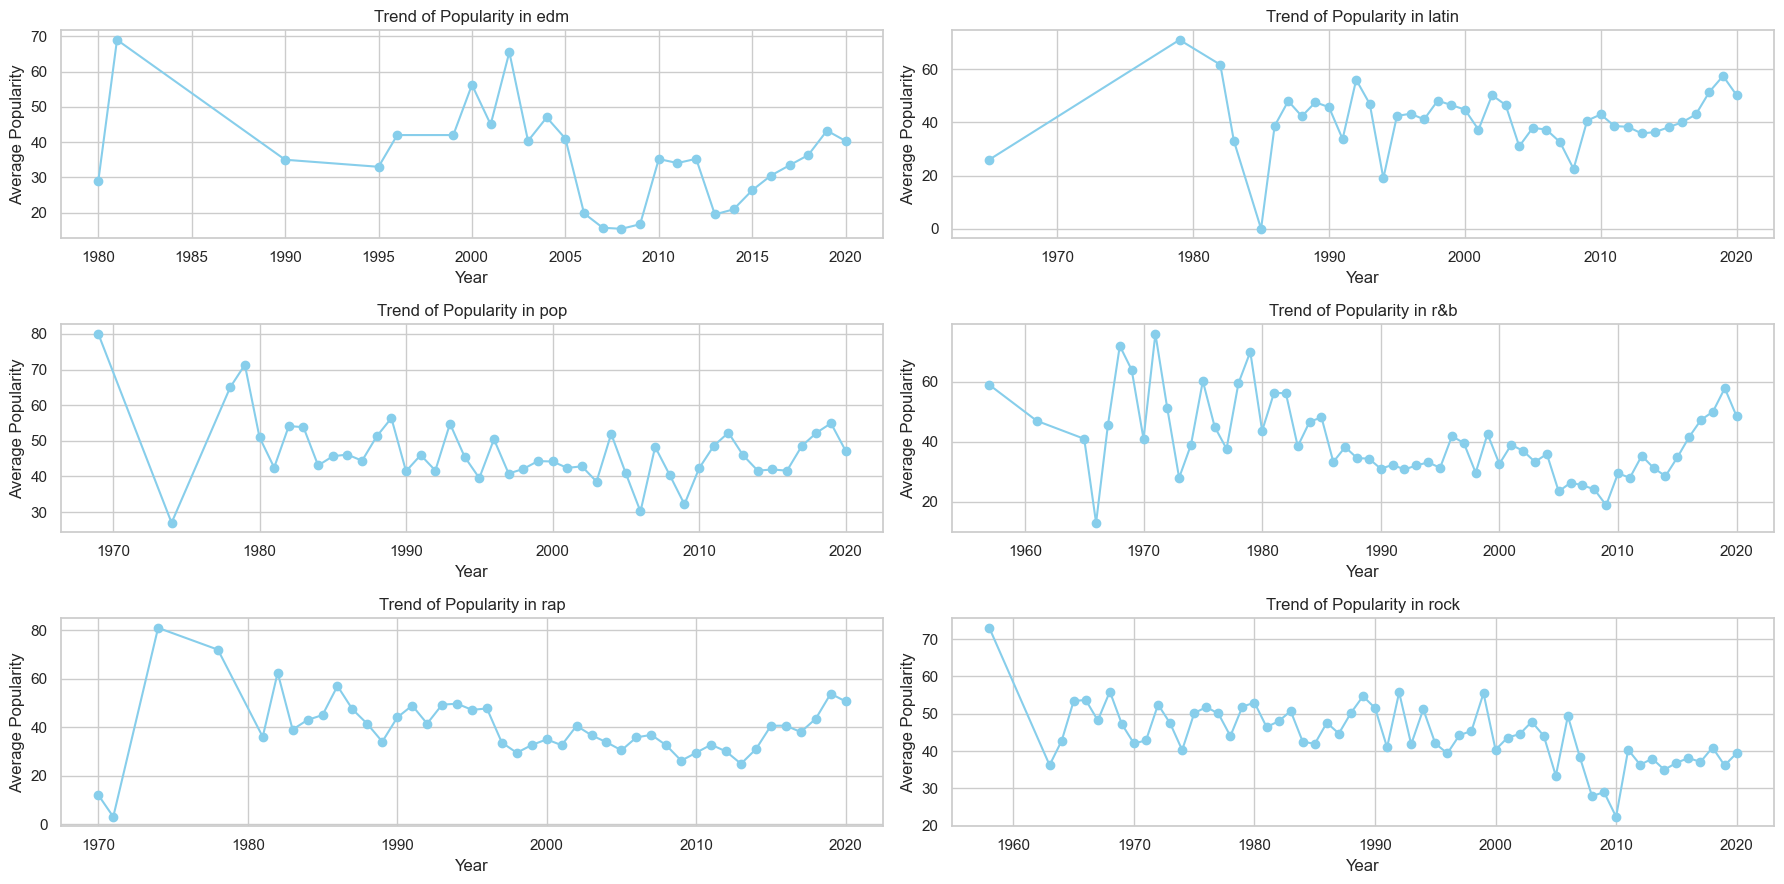

In [ ]:
genres = genre_year_popularity["playlist_genre"].unique()

n_genres = len(genres)
rows = (n_genres + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(18, 9))
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = genre_year_popularity[genre_year_popularity["playlist_genre"] == genre]
    ax.plot(genre_data["release_year"], genre_data["track_popularity"], marker="o", color="skyblue")
    ax.set_title(f"Trend of Popularity in {genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Popularity")
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [ ]:
genre_year_counts = df.groupby(['playlist_genre', 'release_year']).size().reset_index(name="new_songs")
genre_year_counts

,playlist_genre,release_year,new_songs
0,edm,1980.0,1
1,edm,1981.0,1
2,edm,1990.0,1
3,edm,1995.0,1
4,edm,1996.0,1
...,...,...,...
268,rock,2016.0,77
269,rock,2017.0,116
270,rock,2018.0,129
271,rock,2019.0,577


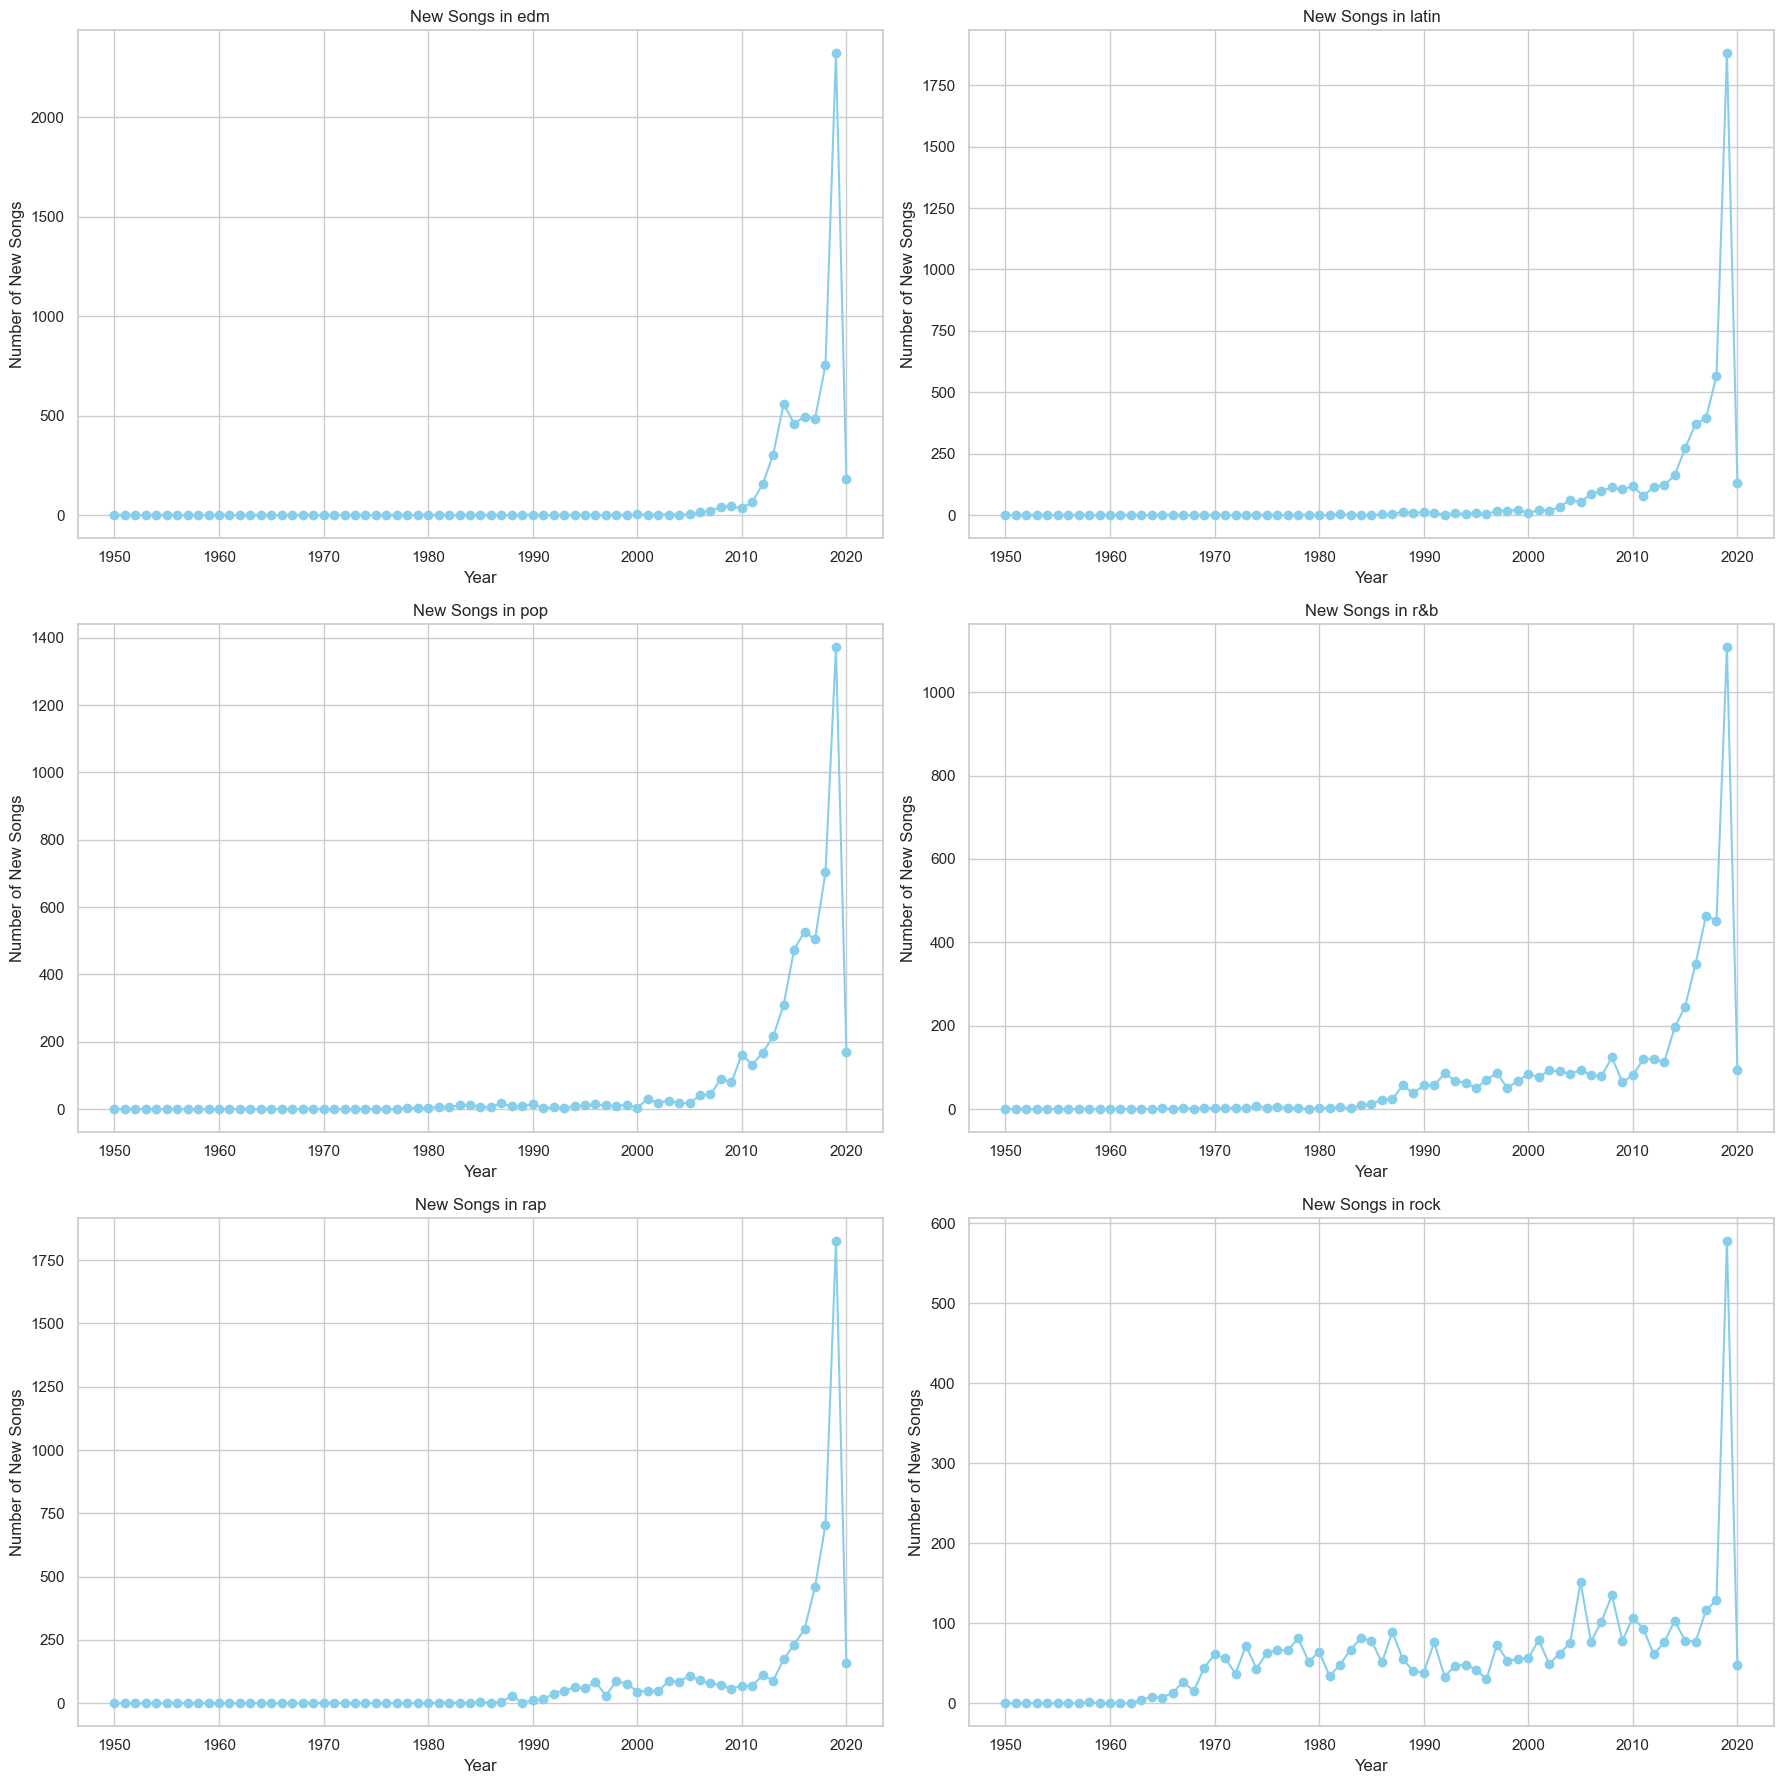

In [ ]:
genres = genre_year_counts["playlist_genre"].unique()

n_genres = len(genres)
rows = (n_genres + 1) // 2 
fig, axes = plt.subplots(rows, 2, figsize=(18, 18))
axes = axes.flatten()

import numpy as np

start_year = 1950
end_year = 2020
all_years = np.arange(start_year, end_year + 1)

complete_data = []
for genre in genres:
    genre_data = genre_year_counts[genre_year_counts["playlist_genre"] == genre]
    genre_data = genre_data.set_index("release_year").reindex(all_years, fill_value=0).reset_index()
    genre_data["playlist_genre"] = genre
    complete_data.append(genre_data)

genre_year_counts = pd.concat(complete_data, ignore_index=True)

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = genre_year_counts[genre_year_counts["playlist_genre"] == genre]
    ax.plot(genre_data["release_year"], genre_data["new_songs"], marker="o", color="skyblue")
    ax.set_title(f"New Songs in {genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of New Songs")
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation Heatmap

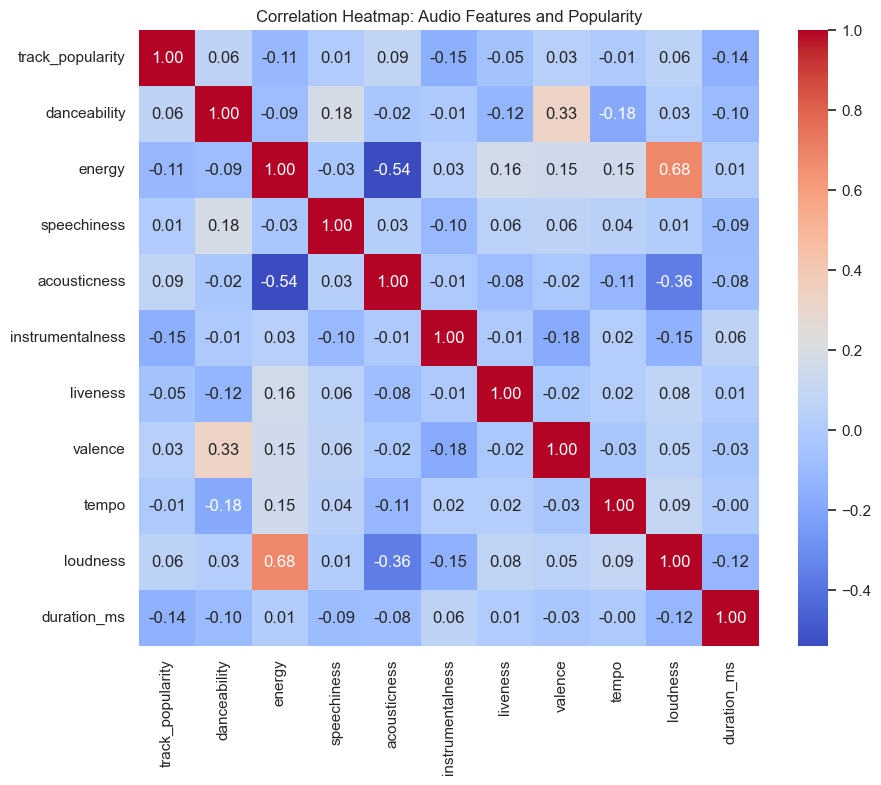

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_features = ['track_popularity', 'danceability', 'energy', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 
                       'tempo', 'loudness', 'duration_ms']
correlation_data = df[heatmap_features]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap: Audio Features and Popularity')
plt.show()